In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load a CSV file for FairFace dataset
fairface_df = pd.read_csv('FairFaceFiltered.csv')

# Display the first few rows of the DataFrame
fairface_df.head()

,image,age,gender,race,age_range
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,4,1,1,30-39
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,3,1,1,20-29
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,3,1,1,20-29
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,4,1,1,30-39
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,2,0,1,10-19


TypeError: Image data of dtype <U80 cannot be converted to float

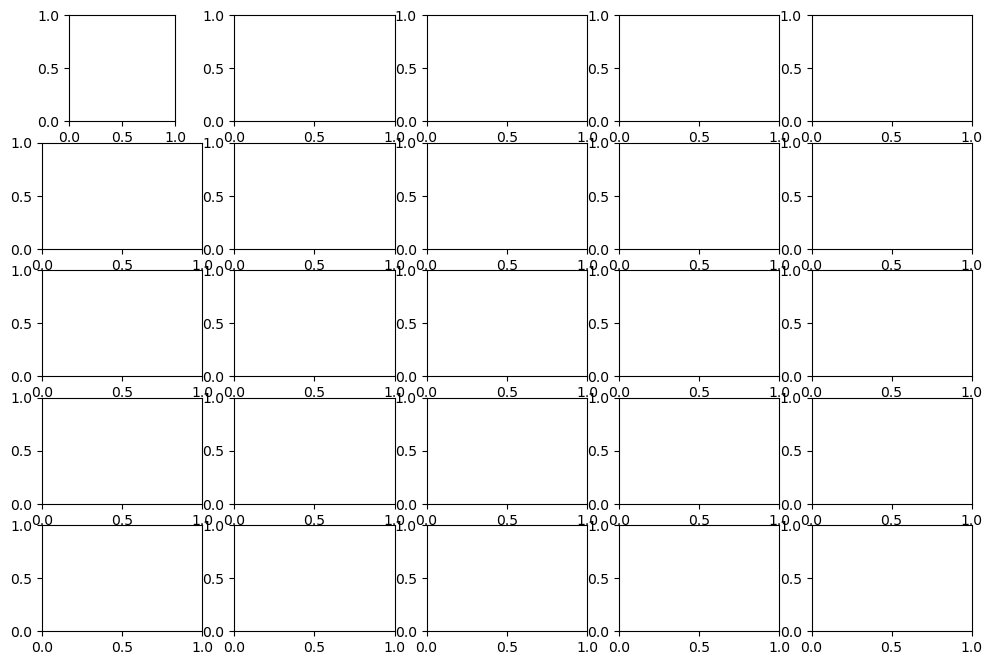

In [3]:
import matplotlib.pyplot as plt

# Number of images to display
num_images = 25

# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12, 8))

# Loop over the first 25 images in the dataframe
for i, ax in enumerate(axes.flat):
    if i < len(fairface_df):
        example = fairface_df.iloc[i]

        # Extract image, age cluster, and gender
        image = example['image']  # This is already a PIL image
        age = example['age_range']  # Predicted age cluster
        gender = example['gender']  # Gender (0 = Male, 1 = Female)
        
        # Display the image
        ax.imshow(image)
        ax.set_title(f"Age: {age}, Gender: {'Male' if gender == 0 else 'Female'}")
        ax.axis('off')  # Hide the axes
    else:
        # Hide the axes if there are no more images to show
        ax.axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [4]:
# Load a CSV file for UTKFacae dataset
utk_df = pd.read_csv('UTKFaceFilteredDataset.csv')

# Display the first few rows of the DataFrame
utk_df.head()

,image,age,gender,race
0,<PIL.Image.Image image mode=RGB size=224x224 a...,18,1,3
1,<PIL.Image.Image image mode=RGB size=224x224 a...,34,0,3
2,<PIL.Image.Image image mode=RGB size=224x224 a...,50,0,3
3,<PIL.Image.Image image mode=RGB size=224x224 a...,23,0,3
4,<PIL.Image.Image image mode=RGB size=224x224 a...,32,0,3


In [5]:
# Define the age mapping
age_mapping = {
    0: "0-2",
    1: "3-9",
    2: "10-19",
    3: "20-29",
    4: "30-39",
    5: "40-49",
    6: "50-59",
    7: "60-69",
    8: "70+"
}

In [6]:
# function to map age_range 
def map_age_to_group(age):
    if 3 <= age <= 9:
        return age_mapping[1]
    elif 10 <= age <= 19:
        return age_mapping[2]
    elif 20 <= age <= 29:
        return age_mapping[3]
    elif 30 <= age <= 39:
        return age_mapping[4]
    elif 40 <= age <= 49:
        return age_mapping[5]
    elif 50 <= age <= 59:
        return age_mapping[6]
    elif 60 <= age <= 69:
        return age_mapping[7]
    else:
        return None  
    
# Define the function to map exact ages to the cluster numbers
def map_age_to_cluster(age):
    if 3 <= age <= 9:
        return 1
    elif 10 <= age <= 19:
        return 2
    elif 20 <= age <= 29:
        return 3
    elif 30 <= age <= 39:
        return 4
    elif 40 <= age <= 49:
        return 5
    elif 50 <= age <= 59:
        return 6
    elif 60 <= age <= 70:
        return 7
    else:
        return None  # For ages outside the clusters we are interested in



In [7]:
# Apply the mapping to create a new 'age_range' column
utk_df['age_range'] = utk_df['age'].apply(map_age_to_group)
utk_df['age_group'] = utk_df['age'].apply(map_age_to_cluster)


In [8]:
utk_df['age_group'] = utk_df['age_group'].astype('int64')

In [9]:
utk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   image      3612 non-null   object
 1   age        3612 non-null   int64 
 2   gender     3612 non-null   int64 
 3   race       3612 non-null   int64 
 4   age_range  3593 non-null   object
 5   age_group  3612 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 169.4+ KB


In [10]:
# remove the original 'age' column
utk_df = utk_df.drop(columns=['age'])

# rename 
utk_df = utk_df.rename(columns={'age_group': 'age'})

# reorder
utk_df = utk_df[['image', 'age', 'gender', 'race', 'age_range']]

In [11]:
# since both the dataset contain only indian race (utk = 3 and fairface = 1) we drop the race column 
utk_df = utk_df.drop(columns=['race'])
fairface_df = fairface_df.drop(columns=['race'])

In [12]:
combined_df = pd.concat([fairface_df, utk_df], ignore_index=True)

In [13]:
# Shuffle the combined DataFrame
shuffled_df = combined_df.sample(frac=1).reset_index(drop=True)
# shuffled_df.head(25)

In [14]:
# Save the filtered dataframe to a CSV file
shuffled_df.to_csv('UTKFace+FairFace.csv', index=False)

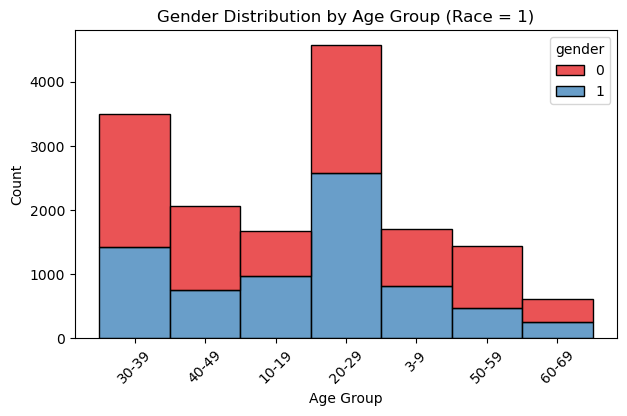

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot for gender distribution by age group
plt.figure(figsize=(7, 4))

# Use seaborn to create a bar plot
sns.histplot(
    data=shuffled_df, 
    x='age_range', 
    hue='gender',  # Color code by gender
    multiple='stack',  # Stack the bars
    palette='Set1',  # Color palette
)

# Set plot title and labels
plt.title('Gender Distribution by Age Group (Race = 1)')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()
